In [5]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from utils import get_rec_table_skinny, get_rec_table_wide, get_player_scatter_vertical, get_player_scatter_horizontal
# import nfl_data_py as nfl

import warnings
warnings.filterwarnings('ignore')

In [6]:
all_data = pd.read_csv(r"data\final_data.csv")

In [11]:
###  SELECTBOX

player = 'Mike Evans'  # from selectbox
all_data = all_data.astype({'season': int})

player_all = all_data[(all_data.player_display_name==player)].reset_index(drop=True)
player_season = player_all[player_all.season==2023].reset_index(drop=True)
player_season2 = player_all[player_all.season > 2021].reset_index(drop=True)

line = (player_all.pp_line.mean() + player_all.ud_line.mean())/2
title = f"{player_all.player_display_name[0]}"


In [5]:
get_rec_table_wide(player_season).style.hide(axis="index").format(precision=0)

week,targets,receptions,receiving_tds,fantasy_points
19,7,3,0,5
18,8,3,0,2
17,4,3,0,7
16,9,7,2,21
15,6,4,1,12
14,6,1,0,1
13,12,7,1,22
12,9,6,2,19
11,12,5,1,10
10,10,6,1,20


In [6]:
get_rec_table_skinny(player_season).style.hide(axis="index").format(precision=0)

week,receiving_yards
19,48
18,22
17,70
16,86
15,57
14,8
13,162
12,70
11,43
10,143


In [7]:
fig = get_player_scatter_vertical(player_season)
fig

In [8]:
# SCATTER PLOT  (POSSIBLE LIGHT OPTION)

fig = px.scatter(player_season,
          x='targets',
          y='receiving_yards',
          size='week',
          color='week',
          template='plotly_white',
          size_max=15,
          width=300,
          height=600,
          color_continuous_scale='blues',
          title = f"{player_all.player_display_name[0]}<br><b><span style='color:yellow'>{player_all.ud_line.mean()}</span><br><span style='color:purple'>{player_all.pp_line.mean()}</span><br>",
          labels={'receiving_yards':'Receiving Yards','targets':'Targets'})
fig.update_coloraxes(showscale=False)
fig.add_hline(y=player_all.ud_line.mean(), line_width=2, line_color="yellow")
fig.add_hline(y=player_all.pp_line.mean(), line_width=2, line_color="purple")
fig.update_layout(title_x=0.5)

In [9]:
##   go.Table skinny

skinny = get_rec_table_skinny(player_season)

fig = go.Figure(data = [go.Table(header = dict(values = ['<br><b>Week</b>', '<b>Rec<br>Yards</b>'],
                                               align = "center"),
                                 cells = dict(values = [skinny.week, skinny.receiving_yards],
                                              align = "center",
                                               font = dict(color = "darkslategrey", size = 11, family = 'Courier New')))])
 
fig.update_layout(width=275, height=600)
table1 = fig
fig.show()

In [10]:
##   go.Table wide

wide = get_rec_table_wide(player_season)

fig = go.Figure(data = [go.Table(columnwidth = [.7,1,.7,1,1],
                                 header = dict(values = ['<b>Week</b>','<b>Targets</b>','<b>Rec</b>','<b>Rec TDs</b>','<b>Fantasy Pts</b>'],
                                               align = "center",
                                               font = dict(size=10, color='black')),
                                 cells = dict(values = [wide.week, wide.targets, wide.receptions, wide.receiving_tds, wide.fantasy_points],
                                              align = "center",
                                              font = dict(color = "darkslategrey", size = 13, family = 'Courier New')))])
 
fig.update_layout(width=550, height=600)
table2 = fig
fig.show()

In [11]:
## ONE PLAYER Receiving Yards Distribution (PLOTLY)

hist_fig = px.histogram(player_season2,#[player_df.season > 2021].reset_index(drop=True),# & (nfl.season == 2023)],
            x='receiving_yards',
            barmode='stack',
            nbins=30,
            template='simple_white',
            text_auto='true',
            color='season',
            width = 700,
            height = 400,
            title=title
            )
hist_fig.show()

In [12]:
###################################################################################
## ECDF Plot (Plotly) last 2 seasons

fig_ecdf = px.ecdf(player_season2, y="receiving_yards", color="season",template='ggplot2',title=title,width=400)#,title=f"<b></b><br>Mean: {round(np.mean(chase.receiving_yards),1)} Median {np.median(chase.receiving_yards)}<br>Underdog Line: {chase.ud_line.mean()}<br><br>",width=600)#  Mean Projection: {round(chase.etr_proj.mean(),1)}<br><br>",width=600)
fig_ecdf.add_hline(y=line, line_width=3, line_color="yellow")
fig_ecdf.add_hline(y=player_season['receiving_yards'].mean(), line_width=2, line_color="black")
fig_ecdf.add_hline(y=player_season.receiving_yards.median(), line_width=2, line_color="red")
fig_ecdf.show()

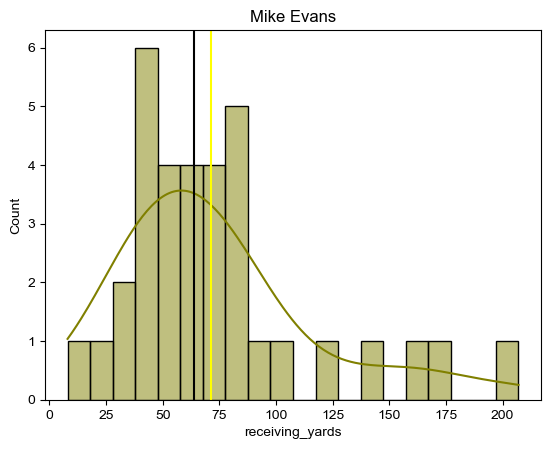

In [13]:
#####################################################################################
## Histogram w/ KDE line

### distplot with kde line
sns.histplot(player_season2.receiving_yards,bins=20,kde=True,color='olive').set(title=title)
sns.set(rc={"figure.figsize":(5, 3)})
plt.axvline(np.median(player_season2.receiving_yards).round(0),linestyle='solid',color='black')
plt.axvline(line,linestyle='solid',color='yellow')

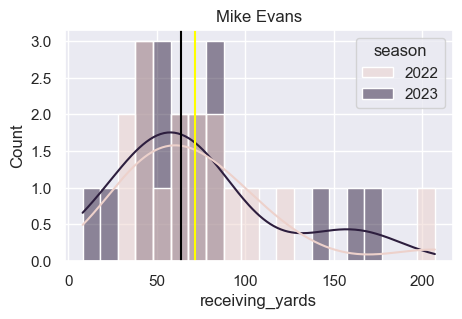

In [14]:
## Histogram w/ KDE line (hue=season)

sns.histplot(player_season2, x="receiving_yards", hue="season",bins=20, kde=True).set(title=title)
sns.set(rc={"figure.figsize":( 5, 3)})
plt.axvline(line,linestyle='solid',color='yellow')
plt.axvline(player_season2['receiving_yards'].median(),linestyle='solid',color='black')

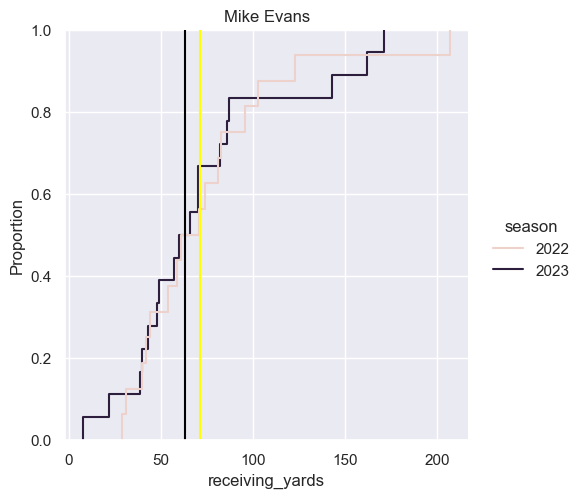

In [15]:
## ECDF Plot (matplotlib) last 2 seasons

sns.displot(data=player_season2, x="receiving_yards", kind="ecdf", hue='season').set(title=title)
sns.set(rc={"figure.figsize":( 5, 3)})
plt.axvline(np.median(player_season.receiving_yards).round(0),linestyle='solid',color='black')
plt.axvline(line,linestyle='solid',color='yellow')
#     plt.show()

In [16]:
##  Horizontal scatter (showing last 2 seasons)

get_player_scatter_horizontal(player_season2)